# Ford GoBike 2019 
## by Shahenda Mahmoud


## Investigation Overview

> The main focus was on investigating the data shared through showing the relation between the variables presented like trip duration, the timings (weekday), and the bike users types, gender and age.

## Dataset Overview

> This dataset includes 174,874 trips with 14 features such as stations , locations, time, durations and user birth year and gender. The dataset is the cleaned form of the original csv file of Ford GoBike data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fgb_clean=pd.read_csv("fgb_2019_clean.csv")

In [3]:
fgb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174874 entries, 0 to 174873
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174874 non-null  float64
 1   start_time               174874 non-null  object 
 2   end_time                 174874 non-null  object 
 3   start_station_name       174874 non-null  object 
 4   end_station_name         174874 non-null  object 
 5   bike_id                  174874 non-null  int64  
 6   user_type                174874 non-null  object 
 7   member_birth_year        174874 non-null  float64
 8   member_gender            174874 non-null  object 
 9   bike_share_for_all_trip  174874 non-null  object 
 10  member_age               174874 non-null  int64  
 11  duration_min             174874 non-null  float64
 12  duration_hrs             174874 non-null  float64
 13  start_weekday            174874 non-null  object 
dtypes: f

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Visualization 1:

> Ford GoBike Users
- As shown below the average age of around 36 years old and after cleaning the data the oldest members are around 90 years old, dropping those older than 90 because it seems like unvalid data.

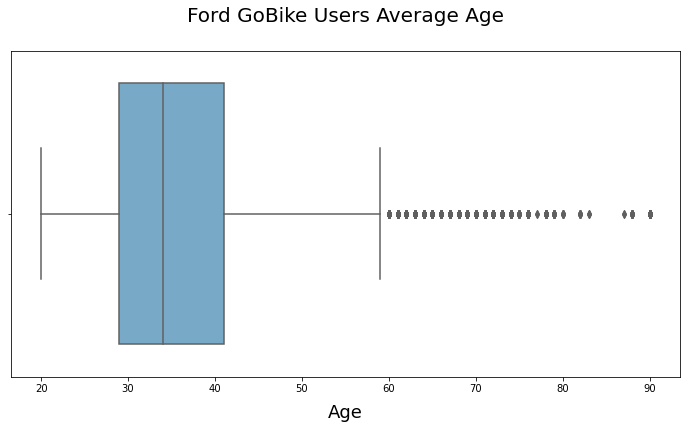

In [4]:
plt.figure(figsize=(12,6))
sb.boxplot(x='member_age', data=fgb_clean, palette='Blues')
plt.title("Ford GoBike Users Average Age", fontsize=20, y=1.07)
plt.xlabel("Age", fontsize=18, labelpad=10);

## Visualization 2:

> Ford GoBike Subscription Types
- As shown below most of the users types are subscriber and only 9% are customers without a subscription which is an indicator that the subscription packages are very effective and saves money


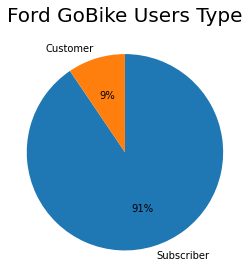

In [5]:
sub_types = fgb_clean['user_type'].value_counts()
plt.pie(sub_types, labels = sub_types.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("Ford GoBike Users Type", fontsize=20, y=1.07)
plt.axis('square');

## Visualization 3:
>Ford GoBike Users Gender
- As shown below are mainly males and only 23% are females
- Males take almost 3 times the number of trips that were taken by females
- others indicates that may be some data are missing or either they are queer


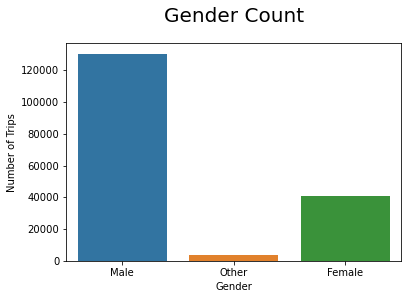

In [6]:
sb.countplot(data = fgb_clean, x = 'member_gender')
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender')
plt.ylabel('Number of Trips');

## Visualization 4
>Ford GoBike Daily Usage per User Type indication
- The graphs below is showing and revealing data regarding the behavior of both types of users of Ford GoBike, it shows that subscribers use the service during weekdays mostly as it's their ride to work mostly and their trips drop down to around 50% less during weekends, while customers ride most equally during all weekdays and even weekends except for thursday it has the most number of trips which gives an indication that customers use bikes on an occasional basis for something unusual in their schedule.

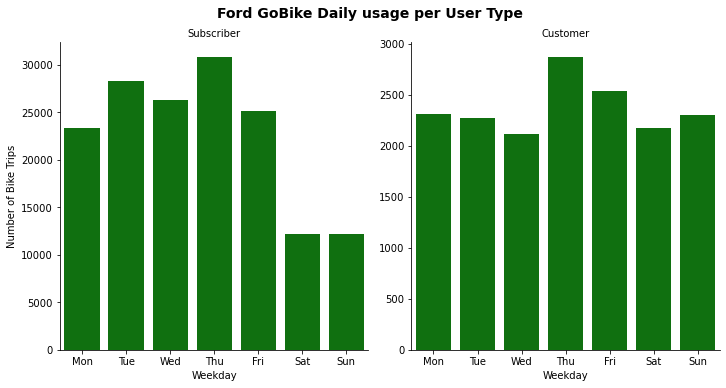

In [7]:
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=fgb_clean, x='start_weekday', col="user_type", kind='count', sharey = False, order = day_order, color='green')
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Ford GoBike Daily usage per User Type', y=1.03, fontsize=14, fontweight='semibold');


## Visualization 5:
>Trip Duration (min) Against Days and Gender
- As shown within the two graphs above females takes longer trip duration than males which may give us an indicator that males have a better fitness and cycling performance.

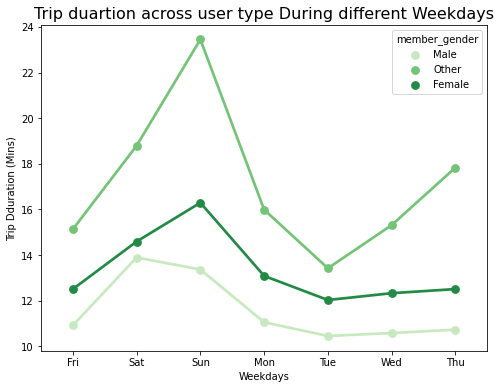

In [8]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = fgb_clean, x = 'start_weekday', y = 'duration_min', hue = 'member_gender', palette = 'Greens', ci=None)
plt.title('Trip duartion across user type During different Weekdays',fontsize=16)
plt.ylabel('Trip Dduration (Mins)')
plt.xlabel('Weekdays')
plt.show();

## Visualization 6:
>Start Stations with the highest number of trips during Feb-2019
- As shown below those are the top 10 stations with the most numbers of trips 

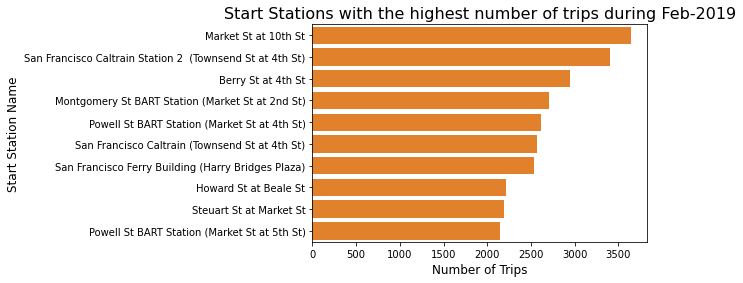

In [9]:
# Ploting start stations with the highest number of trips 
top_start_station = fgb_clean['start_station_name'].value_counts().loc[lambda x : x>2000]
start_station=top_start_station.index

base_color = sb.color_palette()[1]
sb.countplot(data=fgb_clean, y='start_station_name', color=base_color, order=start_station)
plt.xlabel('Number of Trips',fontsize=12)
plt.ylabel('Start Station Name',fontsize=12)
plt.title('Start Stations with the highest number of trips during Feb-2019',fontsize=16);

## Summary of Findings
There are two types of Ford GoBike users which are Customers and Subscribers. 
- Through analysis:
  - Mid weekdays are have the highest number of trips during subscribers and weekends have the higest rates during customers 
  - 91% of the user types in the Ford GoBikes were Subscribers. 9% of the user types in the Ford GoBikes were Customers.
  - Males are 3 times more that Females in Ford GoBike
  - User types play an important role here to impact the number of trips during weekdays and stations 


In [11]:

!jupyter nbconvert Ford_GoBike_Presentation.ipynb --to slides --no-input

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Ford_GoBike_Presentation.ipynb to slides
[NbConvertApp] Writing 720510 bytes to Ford_GoBike_Presentation.slides.html
